## 목적 : 임의의 행렬을 정규직교행렬 형태로 변환하면 행렬의 해석이 용이함
- Deep Neural Network에 적용해보고자 함.

참고교재   
- "Linear Algebra", David C. Lay , Steven R. Lay , Judi J. McDonald

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## 사전지식

### - Definition : 선형변환(Linear transformation)
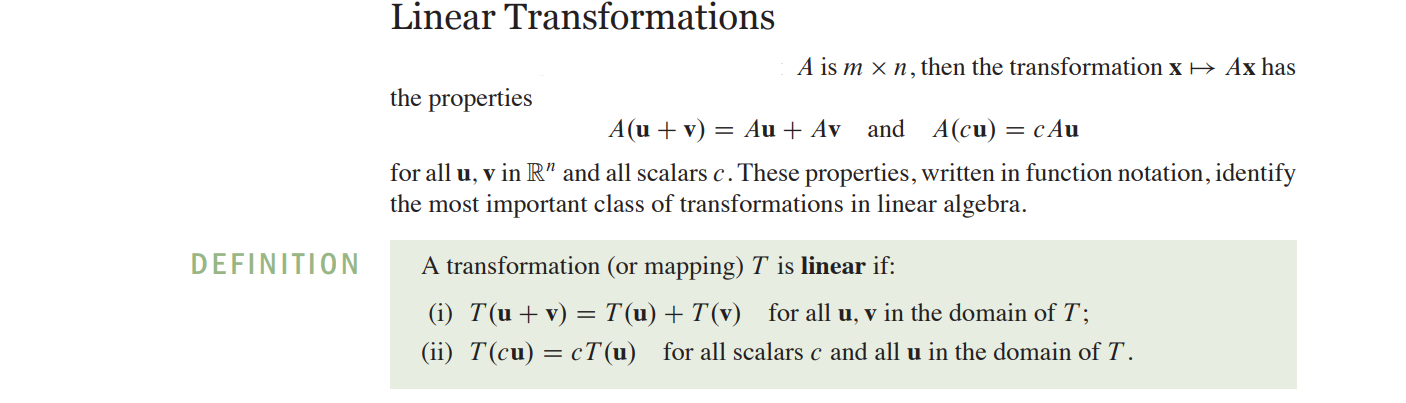

- Linear transformation은 가산성(additivity)와 동차성(homogeneity)를 만족하는 변환임.

In [134]:
A = np.array([[1, -3],
             [3, 5],
             [-1, 7]])
u = np.array([[2],
             [-1]])
v = np.array([[3],
             [5]])
print(np.shape(A))
print(np.shape(u))
print(np.shape(v))

(3, 2)
(2, 1)
(2, 1)


- additivity : $ A(\mathbf{u} + \mathbf{v}) = A(\mathbf{u})+A(\mathbf{v})$

In [135]:
A_uv = np.dot(A, u+v)
Au_Av = np.dot(A,u) + np.dot(A,v)
print(A_uv)
print(Au_Av)

[[-7]
 [35]
 [23]]
[[-7]
 [35]
 [23]]


- homogeneity : $ cA(\mathbf{u}) = A(c\mathbf{u})$

In [136]:
c = 4

cAu = c * np.dot(A, u)
Acu = np.dot(A, c*u)
print(cAu)
print(Acu)

[[ 20]
 [  4]
 [-36]]
[[ 20]
 [  4]
 [-36]]


- 선형변환 간에 연산 순서는 상관없음.
- $ W^{2}(W^{1}\mathbf{x})$   
- $ (W^{2}W^{1})\mathbf{x}$

In [159]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,2)
x = np.random.randn(2,1)

process1 = np.dot(np.dot(W2, W1), (x))
process2 = np.dot(W2, np.dot(W1, x))

print(process1)
print(process2)

[[0.5253844 ]
 [0.79059864]]
[[0.5253844 ]
 [0.79059864]]


- 비선형변환이 있는 연산의 경우 순서가 고려됨.   
- $ W^{2}(\sigma(W^{1}\mathbf{x}))$   
- $ (W^{2}(\sigma W^{1})\mathbf{x}$

In [160]:
W1 = np.random.randn(2,2)
W2 = np.random.randn(2,2)
x = np.random.randn(2,1)

def sigmoid(x):
    return 1 / (1 + np.exp(x))

process1 = np.dot( W2, sigmoid(np.dot(W1, x)))
process2 = np.dot(np.dot(W2, sigmoid(W1)), x)

print(process1)
print(process2)

[[0.14276816]
 [0.40966553]]
[[-0.38946505]
 [ 0.90120796]]


- Deep neural network의 표기에서 아래와 같이 임의의 행렬로 표기할 수 있음
- $ W^{(L)}(\dots \sigma^{(1)}(W^{(1)}Z)) \dots) = A $    
- $ (n_{L} \times n)$ 형태 혹은 $ (n \times n_{L})$ 의 행렬로 $n$은 데이터 수, $n_{L}$ 은 출력층의 차원을 의미   
1. $ W^{(L)}(\dots \sigma^{(1)}(W^{(1)}Z)) \dots) = A $ 인 데이터 수까지 반영하여 행렬 $A$에 대해 다뤄볼 수 있음.   
2. $ W^{(L)}(\dots (\sigma^{(1)}W^{(1)}) \dots) = B $ 인 데이터 행렬 $Z$ 을 제외한 $ (n_{L} \times n_{1})$ 인 행렬에 대해 다뤄볼 수 있음(이때는 연산순서가 고려되기 때문에 연산순서 결과값을 맞춰주는 함수변환 $f$ 혹은 $+P$ 행렬을 더함으로써 같게 만들어주게 하여 다뤄볼 수도 있음

## 
### 선형변환의 기하적 해석 : 벡터 $\mathbf{x}$ 의 차원, 회전, 크기를 변환시킴
- 차원이 같은 경우의 선형변환

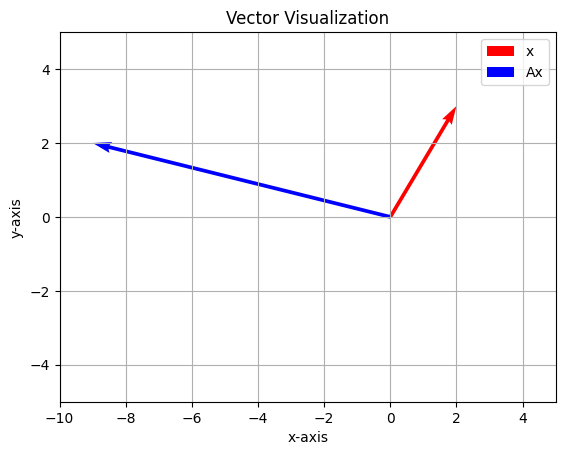

In [148]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[0, -3],
              [1, 0]])
x = np.array([[2],
              [3]])
b = np.dot(A, x)

# 벡터 x를 시각화
plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='r', label='x')
# 벡터 b를 시각화
plt.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b', label='Ax')

plt.xlim(-10, 5)
plt.ylim(-5, 5)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.legend()
plt.title('Vector Visualization')
plt.show()


- 차원이 다른 경우의 선형변환

In [152]:
A = np.array([[1, 2],
             [3, 5],
             [0, 7]])
x = np.array([[2],
             [1]])
print(x)
print(np.dot(A,x))

[[2]
 [1]]
[[ 4]
 [11]
 [ 7]]


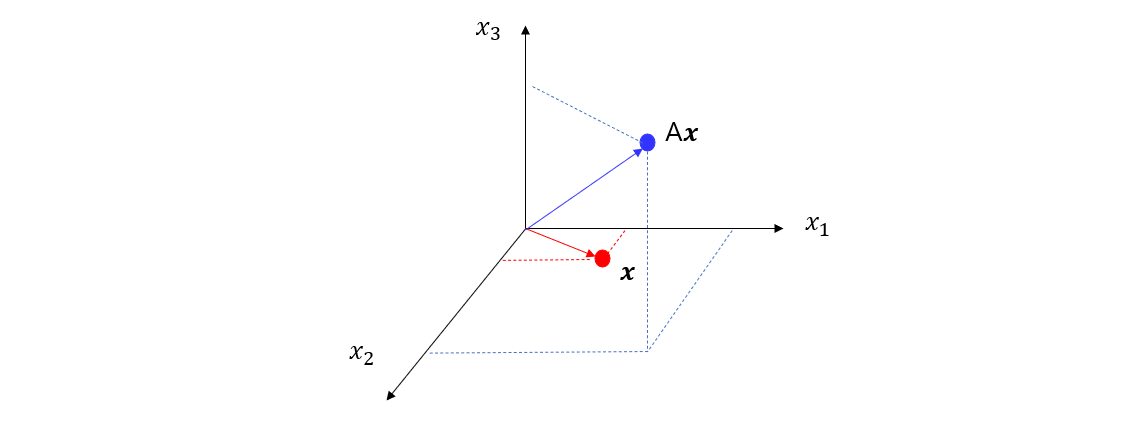

- 이처럼 행렬 $A$ 혹은 벡터와 행렬의 선형변환 $A\mathbf{x}$ 의 성질을 알아내고 사용하고 싶음

### - Definition : 선형독립(Linearly independent)
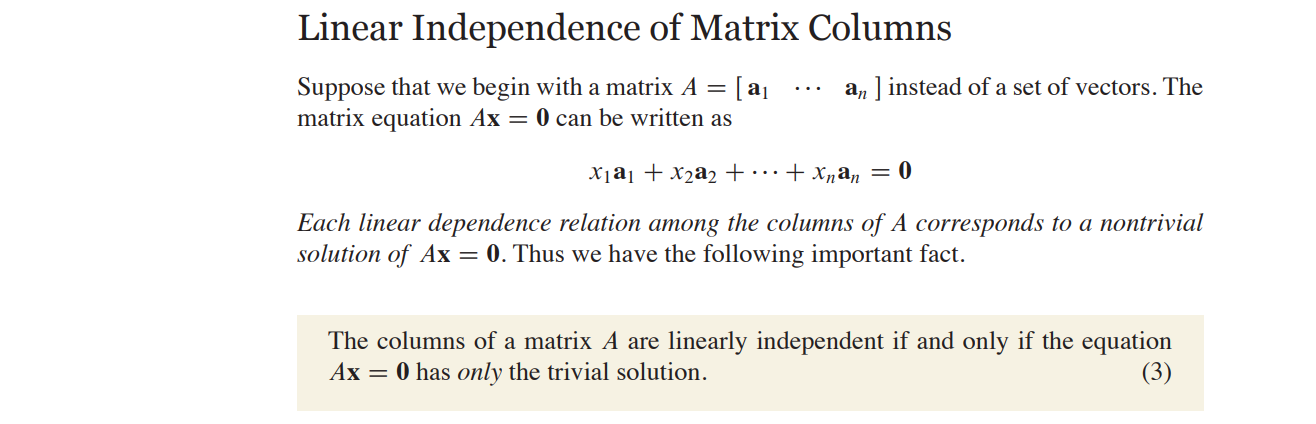
- 임의의 벡터들의 선형결합으로 다른 벡터를 만들어내지 못하는 것을 의미함

### - Definition : 일차결합(Linear combination)
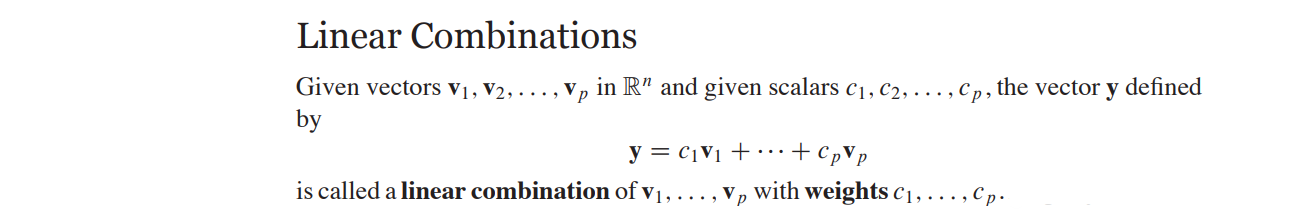
- 임의의 벡터들의 선형결합

### - Definition : Spanning set
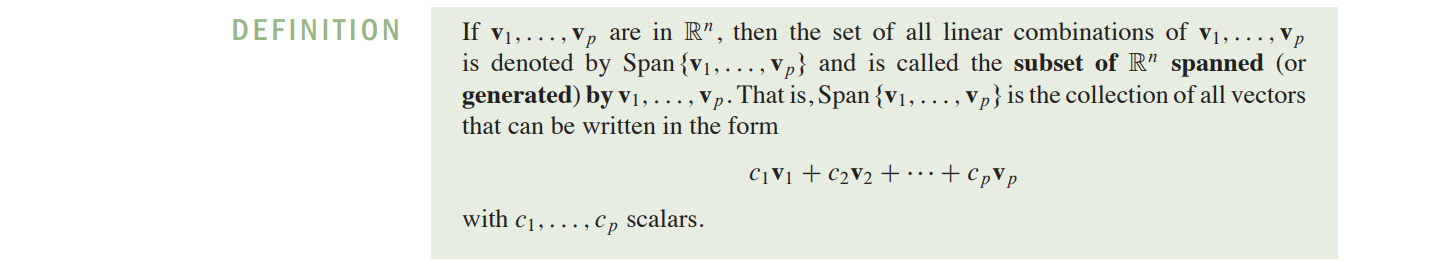
- 임의의 벡터들의 선형결합으로 만들어진 모든 벡터들의 집합

### - Definition : 기저(Basis)
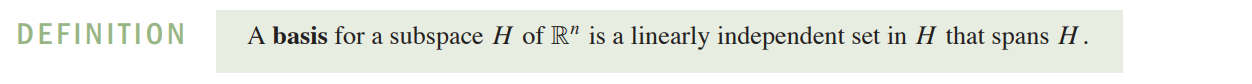
- n차원 부분공간(Subspace)의 모든 벡터들을 span해내는 linearly independent인 벡터들의 집합임 

# 
# 
# 직교하는 벡터들로 이루어진 행렬의 성질
{필요한 개념 : 1. 두 벡터의 직교, 2. 단위벡터}

- Definition : 두 벡터의 직교(orthogonal)
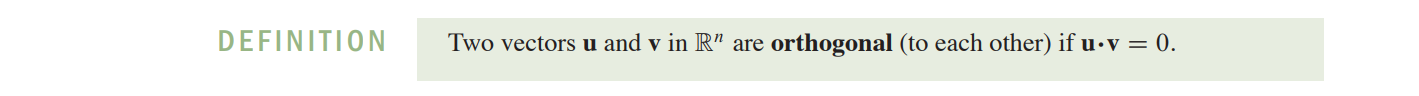
$\mathbf{u}.\mathbf{v} = \mathbf{u}^{T}\mathbf{v}=\parallel {\mathbf{u}} \parallel \parallel {\mathbf{v}} \parallel cos\theta= 0$   
$ \theta=90^{0}, cos\theta=0$
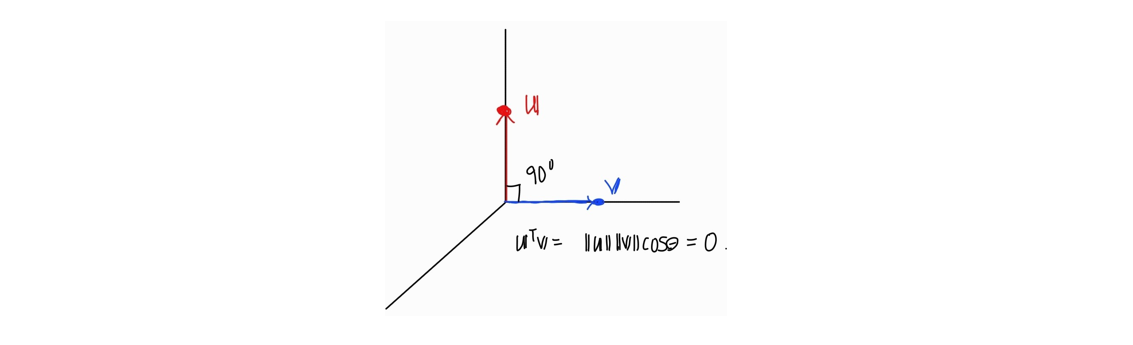

- 벡터 내적 기하적 의미
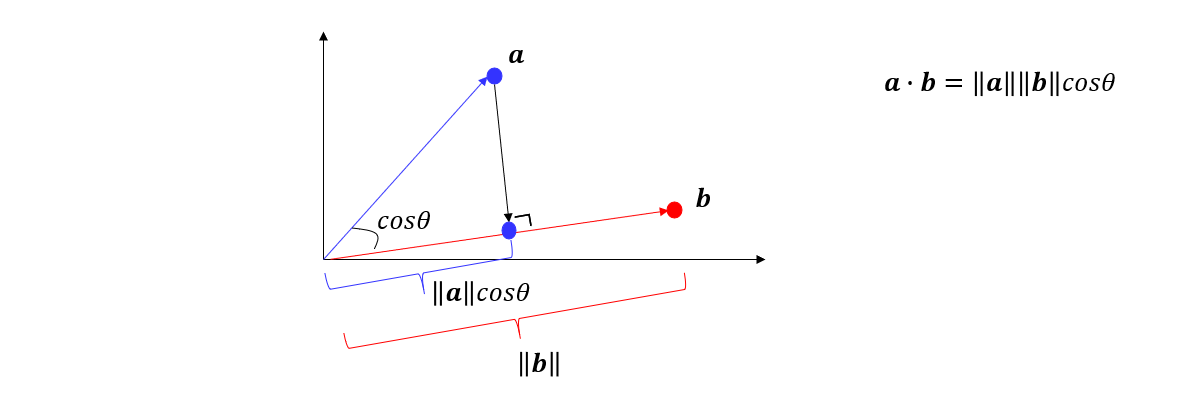

In [140]:
u = np.array([[1],
             [0]])
v = np.array([[0],
             [1]])
print(np.dot(u.T,v))

[[0]]


### Definition : Orthogonal sets
- A set of  {$\mathbf{u}_{1} , ... , \mathbf{u}_{p}$} in $R^{n}$ is said to be an orthogonal set if each pair of distinct vectors from the set is orthogonal, that is, if $\mathbf{u}_{i}.\mathbf{u}_{j}=0$ whenever $i \neq j$
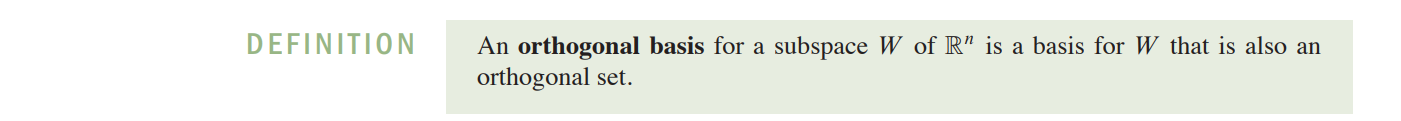

## 
- Definition : 단위벡터(unit vector)   
길이가 1인 벡터, 어떤 임의의 벡터 $\mathbf{u}$ 를 $ \frac{ \mathbf{u}} {\parallel {\mathbf{u}} \parallel}$ 로 정규화함으로써 항상 단위벡터로 만들 수 있음

In [143]:
u = np.random.choice(10, 3)
print(u)
u_norm = np.linalg.norm(u)

unit_u = u / u_norm
print(unit_u)

print("단위벡터 u 길이 : ", np.linalg.norm(unit_u))

[4 0 1]
[0.9701425  0.         0.24253563]
단위벡터 u 길이 :  1.0


### Definition : Orthonormal sets
- A set {$ \mathbf{u}_{1} , ... , \mathbf{u}_{p} $} is an orthonormal set if it is an orthogonal set of unit vectros.   
- If $W$ is the subspace spanned by such a set, then {$ \mathbf{u}_{1} , ... , \mathbf{u}_{p} $} is an orthonormal basis for $W$
#### 
- orthonormal set의 예시 :

In [144]:
A = np.eye(3)
print(A)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


- 3개의 열벡터들은 서로 직교하며 단위벡터임   
- 위와 같은 basis를 Standard basis라고도 함   
- orthogonal set과 orthonormal set는 당연히 linearly independent 함.

### 요약 : 임의의 mxn 행렬 A를 항상 orthonormal basis로 표현할 수 있다.

# 
#### 직교하는 벡터들의 선형결합으로 어떤 벡터를 만들 수 있는 경우
#### Theorem 1.
Let {$\mathbf{u}_{1} , ... , \mathbf{u}_{p}$} be an orthogonal basis for a subspace $W$ of $R^{n}$. For each $ \mathbf{y}$ in $W$, the weights in the linear combination   
$\mathbf{y}=c_{1} \mathbf{u}_{1}+ ... + c_{p} \mathbf{u}_{p}$   
$\mathbf{y} =\frac{\mathbf{y}.\mathbf{u}_{1}} {\mathbf{u}_{1}. \mathbf{u}_{1}} \mathbf{u}_{1}+ ... + \frac{\mathbf{y}.\mathbf{u}_{p}} {\mathbf{u}_{p}. \mathbf{u}_{p}} \mathbf{u}_{p}$      
   
are given by   
   $c_{j}=\frac{\mathbf{y}.\mathbf{u}_{j}} {\mathbf{u}_{j}. \mathbf{u}_{j}} $

- $\mathbf{u}_{i}$ 와$\mathbf{u}_{j}$ 의 내적은 0이라는 성질을 사용하여 유도할 수 있음   
- 그리고 다음과 같은 기하적인 의미를 가짐(즉, $\mathbf{y}와 \mathbf{u}$ 벡터들만으로 가중치 $c$를 구할 수 있다는 의미임.)   
- 그리고 $c$ 는 $\mathbf{u}$ 방향으로의 $\mathbf{y}$ 의 projection을 의미함.
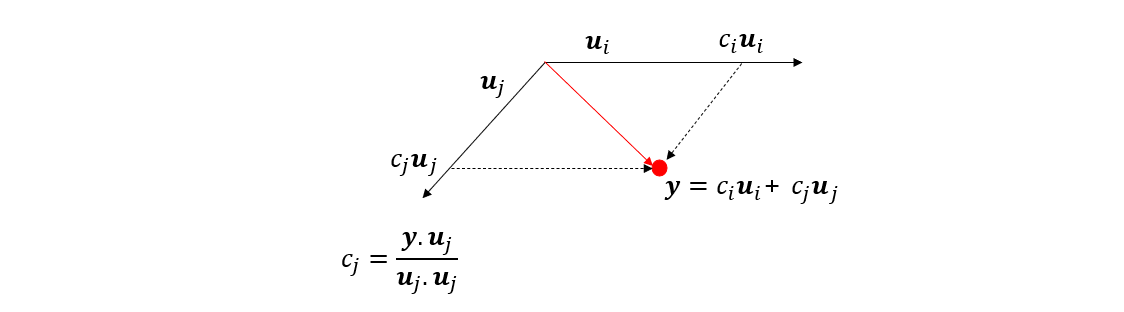

# 
#### 직교하는 벡터들의 선형결합으로 어떤 벡터를 만들 수 없는 경우
$\hat{y} = proj_{\mathbf{y}} =\frac{\mathbf{y}.\mathbf{u}_{1}} {\mathbf{u}_{1}. \mathbf{u}_{1}} \mathbf{u}_{1}+ ... + \frac{\mathbf{y}.\mathbf{u}_{p}} {\mathbf{u}_{p}. \mathbf{u}_{p}} \mathbf{u}_{p}$   
- 이때 만들어지는 $proj_{\mathbf{y}} $는 {$\mathbf{u}_{1} , ... , \mathbf{u}_{p}$}의 선형결합으로 만들어내는 모든 벡터들 중에서 $\mathbf{y}$와 l2-norm이 가장 가까운 벡터임(Theorem 2)
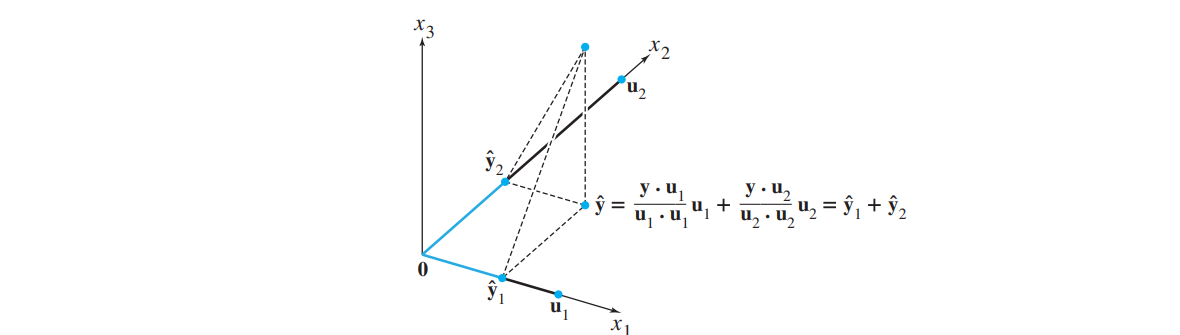

#### Theorem 2. The best approximation theorem
Let $W$ be a subspace of $R^{n}$, let $\mathbf{y}$ be any vector in $R^{n}$, and let $\hat{\mathbf{y}}$ be the orthogonal projection of $\mathbf{y}$ onto $W$. Then $\hat{\mathbf{y}}$  is the closest point in $W$ to $\mathbf{y}$, in the sense that   
$\parallel {\mathbf{y} - \hat{\mathbf{y}}} \parallel < \parallel {\mathbf{y} - \mathbf{v}} \parallel $    
for all $\mathbf{v} $ in $W$ distinct from $\hat{\mathbf{y}}$
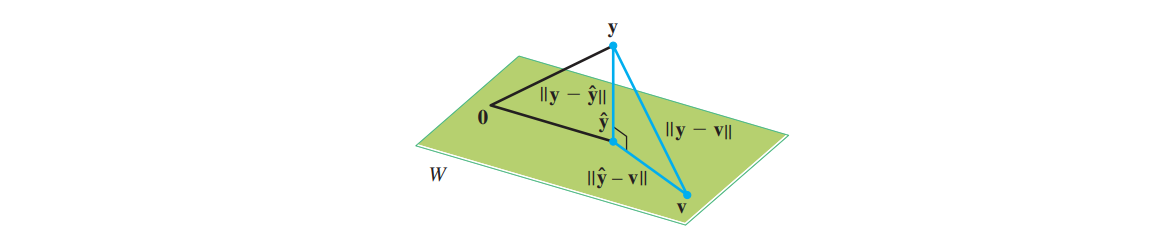

- 만약 {$\mathbf{u}_{1} , ... , \mathbf{u}_{p}$}가 orthonormal basis 라면 $\mathbf{u}_{i}.\mathbf{u}_{i}= 1$ 이므로   
$\hat{y} = proj_{\mathbf{y}} = (\mathbf{y}.\mathbf{u}_{1}) \mathbf{u}_{1}+ ... + (\mathbf{y}.\mathbf{u}_{p}) \mathbf{u}_{p}$   

#### Theorem 3.
If {$\mathbf{u}_{1}, ..., \mathbf{u}_{p}$} is an orthonormal basis for a subspace $W$ of $R^{n}$ , then   
   $\hat{y} = proj_{\mathbf{y}} = (\mathbf{y}.\mathbf{u}_{1}) \mathbf{u}_{1}+ ... + (\mathbf{y}.\mathbf{u}_{p}) \mathbf{u}_{p}$    
If $ U= [\mathbf{u}_{1} ... \mathbf{u}_{p}]$, then   
$ proj_{\mathbf{y}} = UU^{T}\mathbf{y}$ for all $\mathbf{y}$ in $R^{n}$
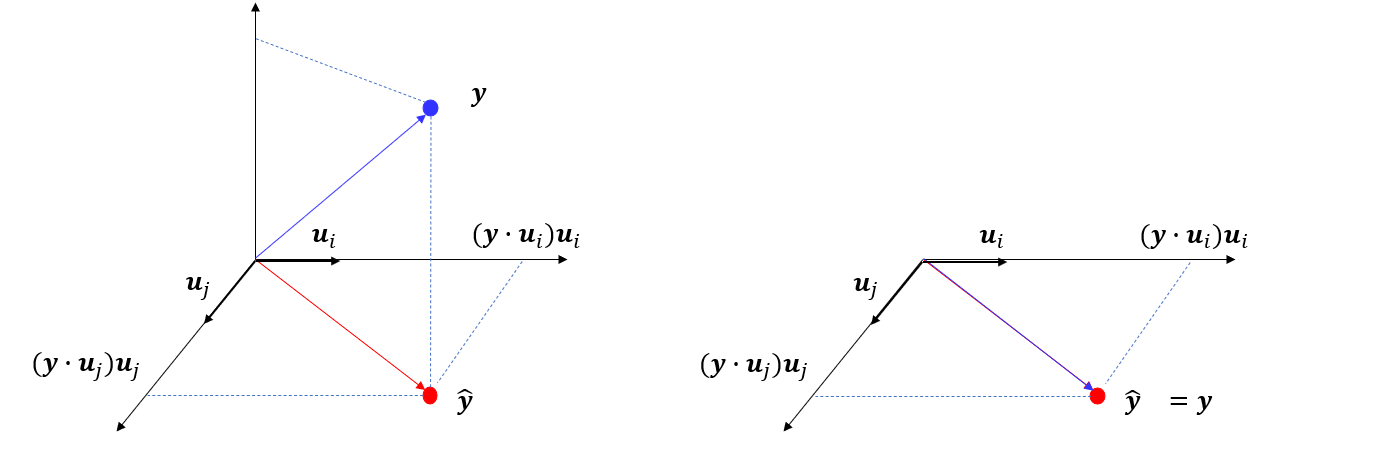

#### 
#### Theorem 4.
An mxn matrix $U$ has orthonormal columns if and only if $U^{T}U=I$

- 하지만 $UU^{T}\neq I$ 일 수 있음

## Orthogonal matrix
In linear algebra, an orthogonal matrix or orthonormal matrix, is a real square matrix whose columns and rows are orthonormal vectors.   
- $ Q^{T}Q=QQ^{T}=I$   
- $ Q^{T}=Q^{-1}$   
#### 
- orthongonal matrix인 경우 $UU^{T}=U^{T}U=I$ 만족   
- 그리고 $ UU^{T}\mathbf{y} = \mathbf{y}$ 

# 
# 
## 어떤 임의의 행렬이 주어졌을 때 orthonormal basis를 찾는 방법
- 1. 어떤 임의의 행렬 $P$ 가 주어졌을 때 정규직교행렬인 orthonormal basis 를 찾을 수 있으며   
- 2. basis들의 선형결합으로 다시 $P$ 행렬을 만들어낼 수 있음.

# 
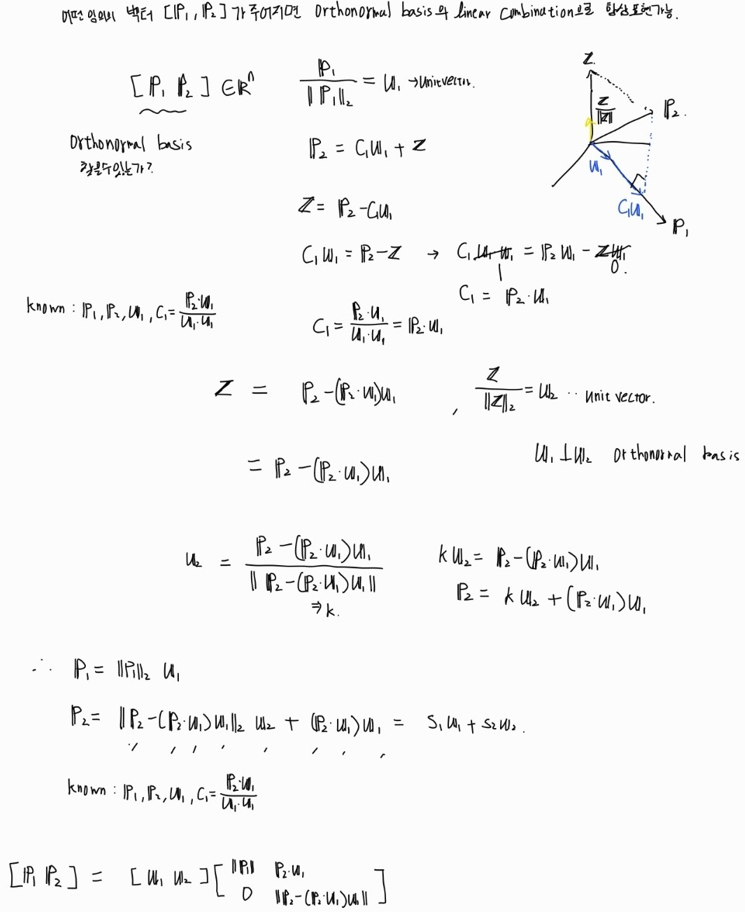
#### 어떤 임의의 벡터 $ \mathbf{p}_{1}, \mathbf{p}_{2}$가 있을 때, orthonormal basis 를 찾아보자

In [21]:
p1 = np.random.choice(10, 3)
p2 = np.random.choice(10, 3)
print(p1)
print(p2)

[0 9 1]
[9 0 3]


- $ \mathbf{p}_{1}$ 벡터를 unit vector 로 만들기

In [22]:
def norm(x):
    s = 0
    for i in x:
        s += i**2
    return np.sqrt(s)

In [23]:
u1 = p1 / norm(p1)
print(u1)
print(norm(u1))

[0.         0.99388373 0.11043153]
0.9999999999999999


- $\mathbf{p}_{2} = c_{1} \mathbf{u}_{1} + \mathbf{z}$   
- $c1 = \mathbf{p}_{2}. \mathbf{u}_{1}$
- $ \mathbf{z} = \mathbf{p}_{2} - (\mathbf{p}_{2} . \mathbf{u}_{1}) \mathbf{u}_{1}$

In [24]:
c1 = np.dot(p2, u1)
print(c1)

0.3312945782245396


- $ \mathbf{u}_{2}= \frac{ \mathbf{z}} {\parallel {\mathbf{z}} \parallel}$

In [25]:
z = p2 - np.dot(p2, u1)* u1
z_norm = norm(z)

In [26]:
u2 = z / z_norm
print(u2)
print(norm(u2))

[ 0.94926229 -0.03472911  0.31256197]
1.0


In [29]:
making_p1 = norm(p1)*u1
print(making_p1)
print(p1)

[0. 9. 1.]
[0 9 1]


In [30]:
making_p2 = z_norm * u2 + np.dot(p2, u1) * u1
print(making_p2)
print(p2)

[9. 0. 3.]
[9 0 3]


In [39]:
U = np.c_[u1, u2]

S = np.eye(2)
S[0][0] = norm(p1)
S[1][0] = 0

S[0][1] = c1
S[1][1] = z_norm

In [40]:
print(np.dot(U,S))

[[0. 9.]
 [9. 0.]
 [1. 3.]]


- 어떤 임의의 행렬에 대한 orthonormal basis 는 유일하지 않음.   
- 하지만 정해진 orthonormal basis의 linear combination으로 표현되는 y 벡터는 유일하다.

# 
#### 임의의 행렬에 대한 orthonormal basis 구해보는 알고리즘 구현
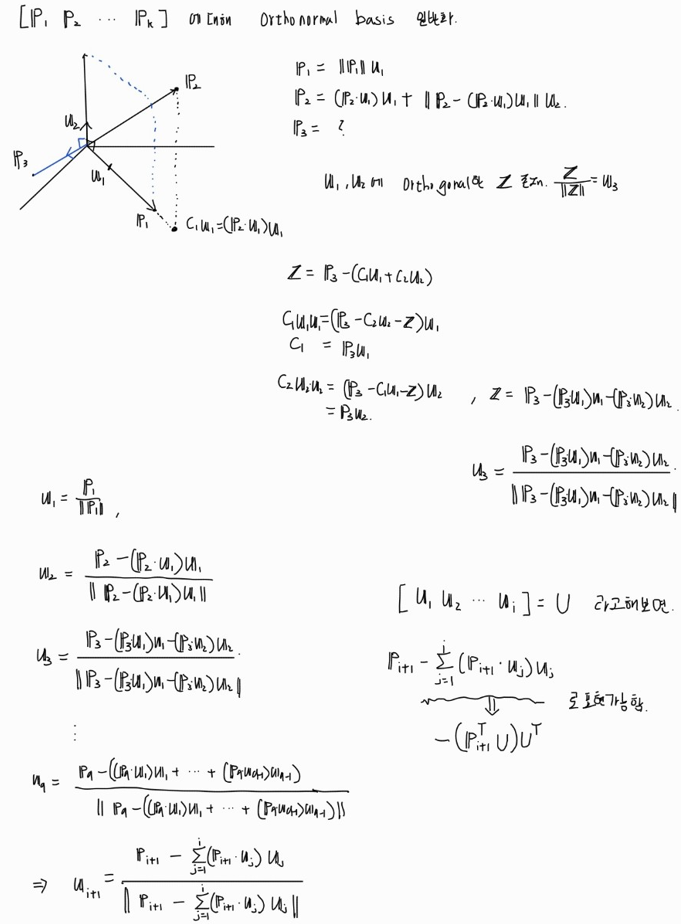
- 위는 Gram-Schmidt process의 unit vector 버전으로 구현한 것임

In [153]:
p1 = np.random.choice(10, 5)
p2 = np.random.choice(10, 5)
p3 = np.random.choice(10, 5)
p4 = np.random.choice(10, 5)

P = np.c_[p1, p2, p3, p4]
print(P)

[[5 5 3 7]
 [1 9 5 2]
 [0 5 7 8]
 [7 6 5 3]
 [1 0 2 3]]


In [88]:
p1 = np.random.choice(10, 5)
p2 = np.random.choice(10, 5)
p3 = np.random.choice(10, 5)
p4 = np.random.choice(10, 5)
p5 = np.random.choice(10, 5)
p6 = np.random.choice(10, 5)
p7 = np.random.choice(10, 5)

P = np.c_[p1, p2, p3, p4, p5, p6, p7]
print(P)

[[3 9 1 3 8 4 3]
 [5 2 3 8 9 4 7]
 [9 3 5 9 0 7 5]
 [0 2 6 4 4 0 9]
 [6 8 4 1 3 3 7]]


In [154]:
for i in range(len(P[0])):
    if i == len(P[:,0]):
        break
    
    p = np.reshape(P[:,i], (-1,1))
    
    if i == 0:
        u = p / norm(p)
        orthonormal_basis = u
    
    else :
        s = np.dot(p.T, orthonormal_basis)
        s = np.dot(s, orthonormal_basis.T)
        s = np.reshape(s, (-1,1))
        s = p - s
        s_norm = norm(s)
        
        u = s / s_norm
        
        orthonormal_basis = np.c_[orthonormal_basis, u]
    
print(orthonormal_basis)

[[ 5.73539335e-01  9.31063970e-17 -1.74670006e-01  8.00295170e-01]
 [ 1.14707867e-01  8.38627869e-01 -4.02444813e-01 -1.73221515e-01]
 [ 0.00000000e+00  5.24142418e-01  7.60102445e-01  1.69517753e-01]
 [ 8.02955069e-01 -1.04828484e-01  1.15806854e-01 -5.48345163e-01]
 [ 1.14707867e-01 -1.04828484e-01  4.65146866e-01  1.01618057e-02]]


- 구해진 orthonormal basis 열의 norm은 1 임

In [155]:
for i in range(len(orthonormal_basis[0])):
    print(norm(orthonormal_basis[:,i]))

0.9999999999999999
1.0
1.0
0.9999999999999999


- 구해진 orthonormal basis의 열들의 내적은 0임

In [156]:
result = np.dot(orthonormal_basis.T , orthonormal_basis)
result = abs(np.round(result, 1))
print(result)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


- $UU^{T} $ 는 $ I $가 아닐 수 있음에 주의   
- orthonormal matrix 일 때 성립함

In [157]:
result = np.dot(orthonormal_basis , orthonormal_basis.T)
result = abs(np.round(result, 1))
print(result)

[[1.  0.  0.  0.  0. ]
 [0.  0.9 0.1 0.1 0.3]
 [0.  0.1 0.9 0.1 0.3]
 [0.  0.1 0.1 1.  0.2]
 [0.  0.3 0.3 0.2 0.2]]


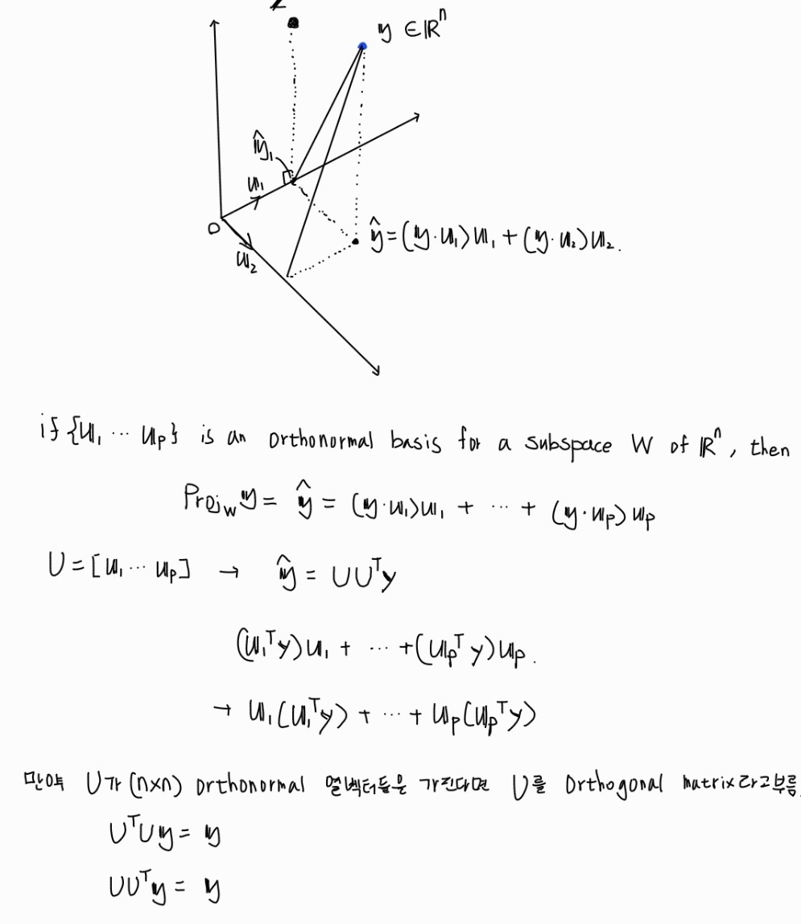

In [102]:
U = orthonormal_basis

In [103]:
p = np.reshape(P[:,1], (-1,1))
y = np.dot(np.dot(U,U.T), p)
print(np.round(y))

[[2.]
 [9.]
 [7.]
 [7.]
 [5.]]


In [105]:
print(np.round(np.dot(U,U.T)))

[[ 1.  0. -0.  0. -0.]
 [ 0.  1.  0. -0.  0.]
 [-0.  0.  1.  0. -0.]
 [ 0. -0.  0.  1.  0.]
 [-0.  0. -0.  0.  1.]]


## 
- MNIST 데이터 60,000X784 에 대한 orthonormal basis 찾기

In [124]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import os
(X, _), (_, _) = mnist.load_data()

# data preprocessing
X = X.reshape(X.shape[0], 784).astype('float32') / 255.

In [125]:
print(np.shape(X))
P = X

(60000, 784)


In [126]:
for i in range(len(P[0])):
    if i == len(P[:,0]):
        break
    
    p = np.reshape(P[:,i], (-1,1))
    
    if i == 0:
        u = p / (norm(p) + 1e-7)
        orthonormal_basis = u
    
    else :
        s = np.dot(p.T, orthonormal_basis)
        s = np.dot(s, orthonormal_basis.T)
        s = np.reshape(s, (-1,1))
        s = p - s
        s_norm = norm(s)
        
        u = s / (s_norm + 1e-7)
        
        orthonormal_basis = np.c_[orthonormal_basis, u]
    
print(orthonormal_basis)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [127]:
print(np.shape(orthonormal_basis))

(60000, 784)


In [128]:
for i in range(len(orthonormal_basis[0])):
    print(norm(orthonormal_basis[:,i]))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9999998020099506
0.9999998823837568
0.793409012870494
0.9999855001630181
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.9999984502792358
0.9999967815120654
0.9999998146416762
0.9999999245086627
0.999999966205007
1.000000028381705
0.999999999250112
0.9999999640229355
1.000000080458036
1.0000001049936005
1.0000001599114312
1.0000000603486954
0.9999999229803732
0.9999999539432074
0.9999998505623765
0.999999992327496
1.000000120555941
1.000000133642128
1.0000000141301548
0.9999997878669425
0.0
0.0
0.0
0.0
0.0
0.0
0.9999996423721313
0.999999216955408
0.9999998277512763
0.9999998371623418
1.000000023303061
1.0000000878794346
1.0000000469562453
1.0000000925533943
0.9999999802175507
1.000000172099558
1.0000002415349156
0.9999999115161571
1.0000004302123449
1.0000002519336841
1.0000003934360209
1.0000005576944213
1.0000001836470234
1.0000005087355395
1.0000013554350347
1.0000015388811216
1.0000015808492446
1.000002618987372
1.

1.0000307387280043
1.0000319193548008
1.000037744982032
1.000051496881801
1.0000472000039708
0.0
1.0000646214781512
1.0000472096460546
1.0000275601836413
1.0000213669454185
1.000016179470894
1.0000156633934576
1.0000119076261178
1.0000087723777755
1.0000081733871085
1.0000083693262347
1.000006691343654
1.000005573817462
1.0000065881795899
1.0000028787952944
1.0000064627332994
1.0000010631735923
1.000002949218479
1.0000076623874234
1.0000120092673326
1.000012046787234
1.000013329740148
1.0000205466839762
1.0000250234505659
1.0000285668792022
1.0000407214576525
1.000054381639155
1.0000678875353042
1.00004999778713
1.000050213925865
1.0000463972162656
1.0000352910685066
1.0000176816665218
1.0000173299251809
1.0000145159651486
1.0000122161726606
1.000011186442935
1.0000094520214755
1.0000082453736179
1.0000092922244066
1.0000073583938853
1.0000063206908605
1.0000047497714557
1.0000042895779535
1.0000046996788763
1.0000056237351462
1.0000061236170488
1.0000116010337954
1.0000112065208835
1.

- 수치오차가 존재하지만 근사치 구한 결과   
- 합이 784가 나오지 않았다는 것은 모든 값이 0열인 곳이 존재함.

In [129]:
result = np.dot(orthonormal_basis.T , orthonormal_basis)
total = np.sum(result)
total = np.round(total, 1)
print(total)

712.3


In [130]:
U = orthonormal_basis
result = np.dot(U, U.T)
print(result)

[[ 1.69382282e-02  1.72603512e-04  7.74441869e-05 ...  1.00280601e-03
  -1.71815962e-04 -2.32563143e-05]
 [ 1.72603512e-04  5.98455267e-03 -5.04932505e-05 ... -1.89980085e-04
   1.14387670e-03  1.78932009e-04]
 [ 7.74441869e-05 -5.04932505e-05  2.63706744e-02 ...  3.00953016e-05
  -2.53924081e-04  4.59123898e-04]
 ...
 [ 1.00280601e-03 -1.89980085e-04  3.00953016e-05 ...  8.27035680e-03
   2.52179685e-04  1.09457622e-04]
 [-1.71815962e-04  1.14387670e-03 -2.53924081e-04 ...  2.52179685e-04
   1.43805929e-02  2.69301032e-04]
 [-2.32563143e-05  1.78932009e-04  4.59123898e-04 ...  1.09457622e-04
   2.69301032e-04  1.24557745e-02]]


In [131]:
print(np.sum(result))

56820.406


- 0인 열들 지우고 다시

In [165]:
# 열의 합이 0이 아닌 열을 찾습니다.
non_zero_cols = np.where(np.sum(X, axis=0) != 0)[0]
# 원래 행렬에서 0이 아닌 열을 가져옵니다.
X = X[:, non_zero_cols]
print(np.shape(X))

(60000, 717)


In [166]:
P = X
for i in range(len(P[0])):
    if i == len(P[:,0]):
        break
    
    p = np.reshape(P[:,i], (-1,1))
    
    if i == 0:
        u = p / (norm(p) + 1e-7)
        orthonormal_basis = u
    
    else :
        s = np.dot(p.T, orthonormal_basis)
        s = np.dot(s, orthonormal_basis.T)
        s = np.reshape(s, (-1,1))
        s = p - s
        s_norm = norm(s)
        
        u = s / (s_norm + 1e-7)
        
        orthonormal_basis = np.c_[orthonormal_basis, u]
    
print(orthonormal_basis)

[[ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  3.2051044e-04
   5.8343989e-04  3.0247934e-04]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  2.0864123e-04
  -2.6653340e-04 -7.4503288e-05]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -8.1168156e-04
  -2.5580358e-03  7.1227974e-03]
 ...
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ... -1.6761023e-04
  -5.7671202e-04  4.5938119e-05]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.4613855e-04
   2.7849592e-04 -3.5981406e-04]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00 ...  1.5838312e-04
  -2.8810473e-04  1.0988757e-04]]


In [168]:
print(np.shape(orthonormal_basis))

(60000, 717)


In [169]:
for i in range(len(orthonormal_basis[0])):
    print(norm(orthonormal_basis[:,i]))

0.9999998020099506
0.9999998689455615
0.8369278805636068
0.9999825327946842
0.9999984502792358
0.9999967815120654
0.9999998146416762
0.9999999245086627
0.999999966205007
1.000000028381705
0.999999999250112
0.9999999640229355
1.0000000081977856
1.0000000296264286
0.999999961673997
1.000000139634429
0.9999999310419083
1.000000131200911
1.0000001019727056
0.9999998710675375
0.9999998949283291
1.0000001648617816
1.0000001087851043
0.9999999065391517
0.9999996423721313
0.999999216955408
0.9999998277512763
0.9999998371623458
1.0000000244425655
0.9999999930178114
1.0000002448440828
1.000000163791612
1.0000000717065953
1.000000070884521
1.0000003392427106
1.0000001570587813
0.9999998791398098
1.000000557390253
1.0000005083000925
1.0000007731055598
1.0000002966599097
1.0000007470036858
1.000001724408459
1.000001586095963
1.0000014897245362
1.0000026205589811
1.0000016285343318
1.0000017763432982
0.9999993967460192
1.0000039462841401
1.0000018665911368
1.0000033321035968
1.0000027089665116
1.000

1.0000156257164656
1.0000163265550968
1.0000102991272426
1.000010923382365
1.0000084155928577
1.0000084894768453
1.00000737539833
1.000003688133182
1.0000068622561447
1.0000028059427188
1.0000060654922092
1.000001509066732
1.0000027580269535
1.0000071450570402
1.000009315235884
1.0000121113144096
1.0000136238640907
1.000020201816029
1.0000251272437817
1.0000286445180473
1.000040480249417
1.0000544800872102
1.0000679439856484
1.0000499624576837
1.000050217394837
1.0000461946828352
1.00003524485313
1.000017566501613
1.0000179159890887
1.0000142863582762
1.0000106555595483
1.0000109097427228
1.000009489245361
1.000007491846111
1.0000088776081095
1.00000772546307
1.0000055071734675
1.0000046757322922
1.0000045077344601
1.0000024721671654
1.0000047432697858
1.000007166606959
1.000010554288231
1.0000088860161067
1.0000147010711238
1.000020960025212
1.0000295801267352
1.0000322043987517
1.0000405888116788
1.0000386327885389
1.0000637229423286
1.0000248486784264
1.000049014287678
1.00005221275

In [170]:
result = np.dot(orthonormal_basis.T , orthonormal_basis)
total = np.sum(result)
total = np.round(total, 1)
print(total)

712.2


- 수치오차로 해석됨

# 
## Least Squares Problems

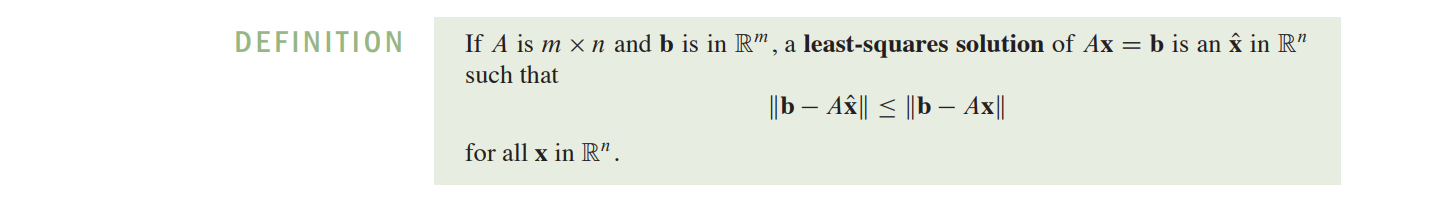

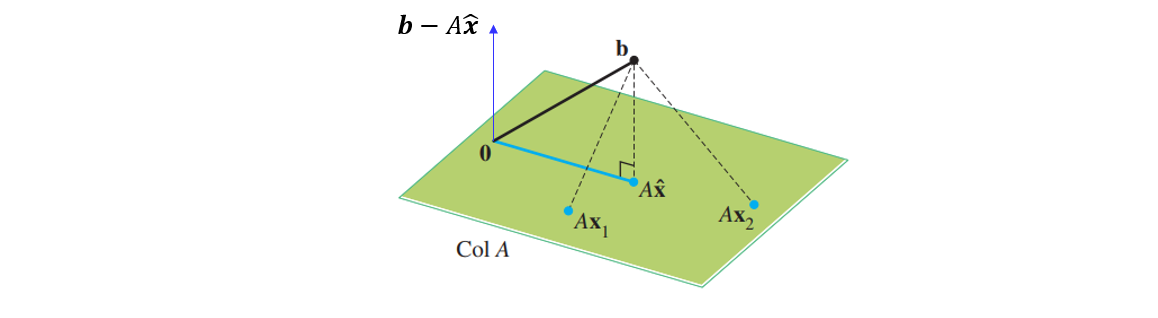

Definition : Col A (A 행렬의 열공간)   
$ A$ 행렬의 열벡터들 $[\mathbf{a}_{1} \dots \mathbf{a}_{n}]$ 의 모든 선형결합 즉, $Span{ \{ \mathbf{a}_{1} \dots \mathbf{a}_{n} \}}$

#### 
#### Solution of the General Least-Squares Problem
위에서 주어진 $ A, \mathbf{b}$ 에 대하여 $\parallel \mathbf{b} - A\hat{\mathbf{x}} \parallel \leq \parallel \mathbf{b} - A\mathbf{x} \parallel $ 을 만족하는 $A \hat{\mathbf{x}} = \hat{\mathbf{b}}$ 이 주어졌다고 하자, 

그렇다면 $\mathbf{b} - A\hat{\mathbf{x}}$ 은 col A 와 직교하게 되므로 즉, $ \mathbf{a}_{j}^{T} (\mathbf{b} - A\hat{\mathbf{x}})=0, j=1,...,n $에 대해 만족하므로   
$ A^{T}(\mathbf{b} - A\hat{\mathbf{x}})=0$ 이 성립함.   
$ A^{T}\mathbf{b} - A^{T}A\hat{\mathbf{x}}= 0$   
   
$ ∴ A^{T}\mathbf{b} = A^{T}A\hat{\mathbf{x}}$   
   
   즉 $A\mathbf{x}=\mathbf{b}$ 의 모든 최소제곱해는 위와 같음. 이를 정규방정식(normal equation)이라고도 부름.

최소제곱해는 다음과 같은 성질을 가짐.
- 최소제곱해는 항상 존재함. 즉, $A^{T}\mathbf{b} = A^{T}A\hat{\mathbf{x}} $의 해 $ \hat{\mathbf{x}}$ 가 존재함.   
- 만약 (mxn) 행렬 $A $ 의 열들이 linearly independent 혹은 $A^{T}A$ 가 non-singular matrix 일 경우 유일한 최소제곱해가 존재함.  
$\hat{\mathbf{x}} = (A^{T}A)^{-1}A^{T}\mathbf{b}$

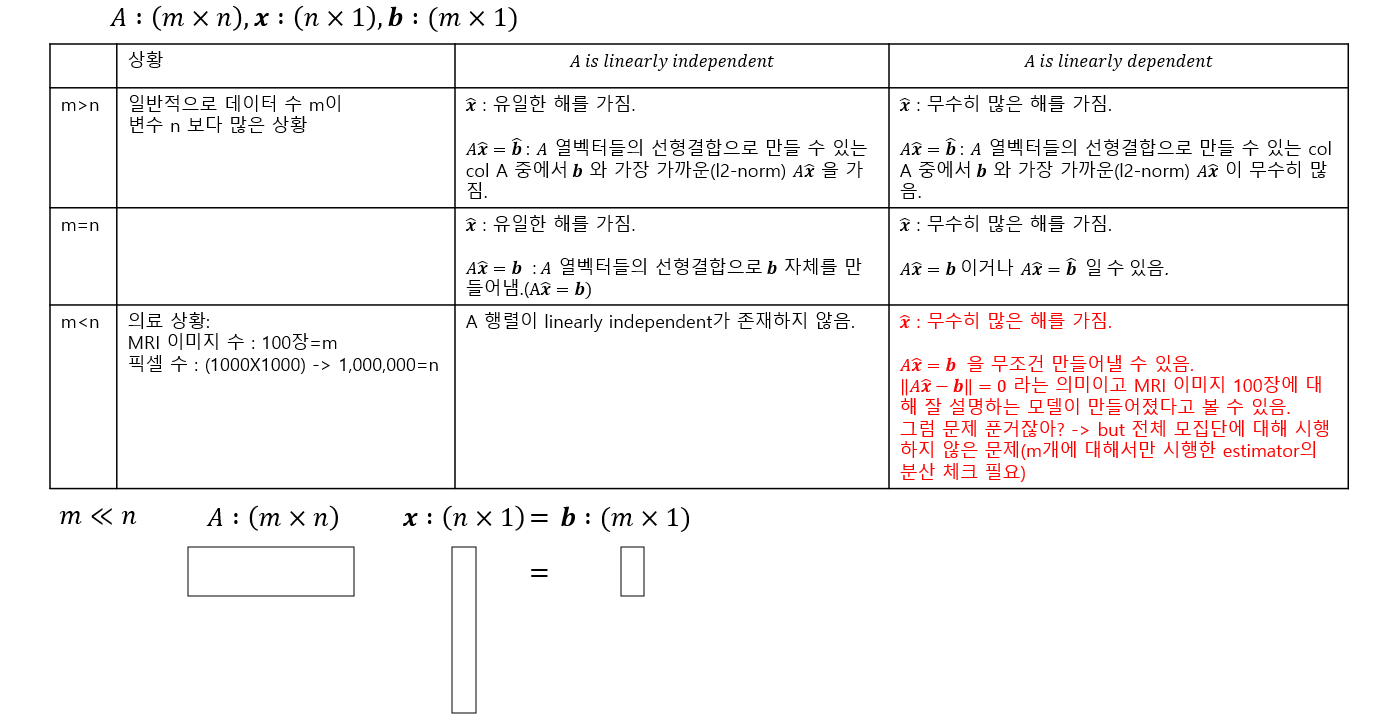

? : 그렇다면 Deep Neural Network  로 최소화한  $\parallel W^{(L)}(\dots \sigma^{(1)}(W^{(1)}Z)) \dots) - \mathbf{y} \parallel $ 는 어떠한가?

- MNIST 데이터셋에 대해 m>>n 인 경우와 m<<n 인 경우에 대해 선형회귀와 DNN을 실험해봄

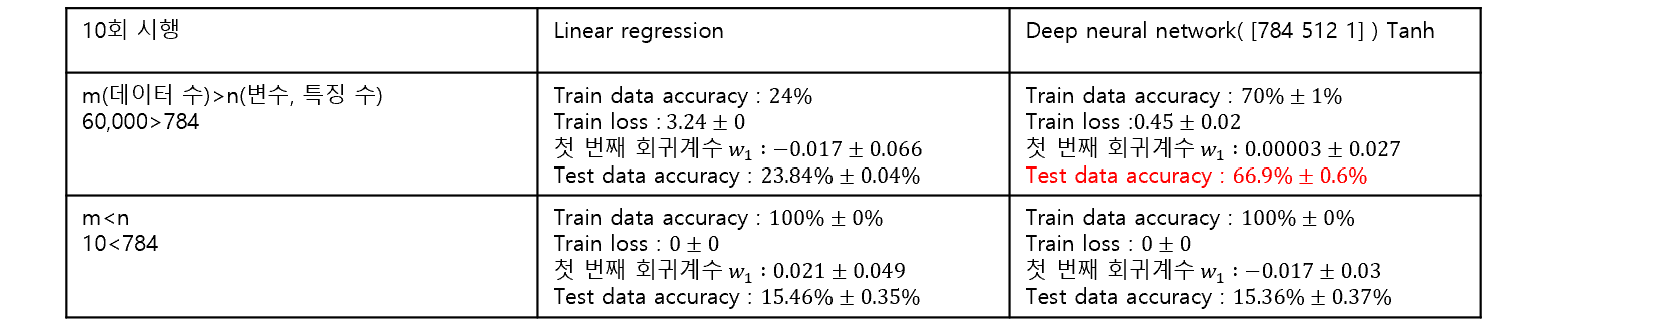

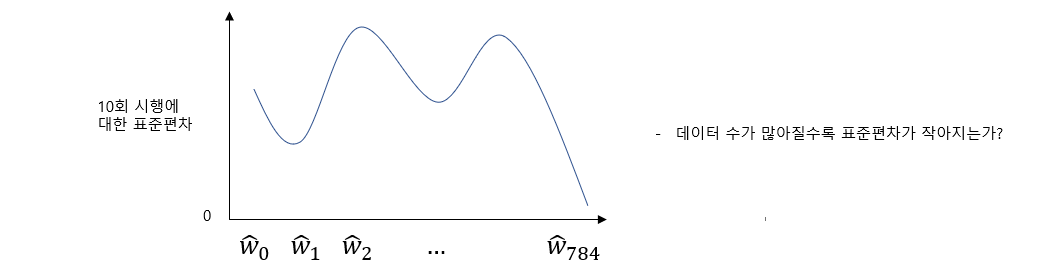

- 선형변환 회귀계수의 표준편차가 MNIST의 경우 선형종속 관계가 있어 존재함.

## 
#### 실험 1. m(10개) << n(784차원) 인 상황에서 선형회귀와 Deep neural network를 수행해봄 
- 0부터 9까지 이미지를 1개씩 가져와서 학습데이터셋으로 두고 학습 후    
- mean squared error를 가지고 평가하고 output은 0에서 9까지 레이블을 맞추게하는 연속적인 예측값을 갖게하고 최소제곱하는 것으로 둠   
- output에 대한 정확도는 예측한 값이 0부터 9까지 중 l2-norm이 가장 작은 것을 예측하는 것으로함   
- 예를 들어 예측값이 3.1인 경우 0부터 9까지 중 3이 가장 가까운 l2-norm이므로 3을 예측했다고 표시
- 이를 10회 시행함.

* 학습 후 확인해야 하는 지표 :
   1. 학습된 선형회귀 모델의 손실함수 값이 0이어야 함(quadratic programming이므로 learning rate를 적절히 잘 수행하였다면 global optimal을 찾을 것이기 때문)   
   2. 선형회귀 파라미터의 분산이 클 것임(회귀계수 784개와 절편 1개의 10회에 대한 평균과 표준편차 기재
   3. 시험데이터 10,000개에 대해 정확히 예측할 것인가?

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import os
(X, y), (X_test, y_test) = mnist.load_data()

# data preprocessing
X = X.reshape(X.shape[0], 784).astype('float32') / 255.
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255.


(60000, 784)
(60000,)


- 학습데이터 레이블별로 1개씩 총 10개 구성

In [8]:
import numpy as np

# 초기화된 배열
selected_samples = np.empty((10, X.shape[1]), dtype=np.float32)
selected_labels = np.empty(10, dtype=np.uint8)

# 각 클래스에 해당하는 첫 번째 샘플을 선택
for i in range(10):
    class_indices = np.where(y == i)[0]
    selected_sample_index = class_indices[0]
    selected_sample = X[selected_sample_index]
    selected_label = y[selected_sample_index]
    selected_samples[i] = selected_sample
    selected_labels[i] = selected_label

# 선택된 샘플 및 레이블을 X와 y에 다시 할당
X = selected_samples
y = selected_labels

# 데이터 형태 확인
print(X.shape)
print(y)
y = np.reshape(y, (-1,1))

(10, 784)
[0 1 2 3 4 5 6 7 8 9]


- 구성된 학습데이터 그려보기

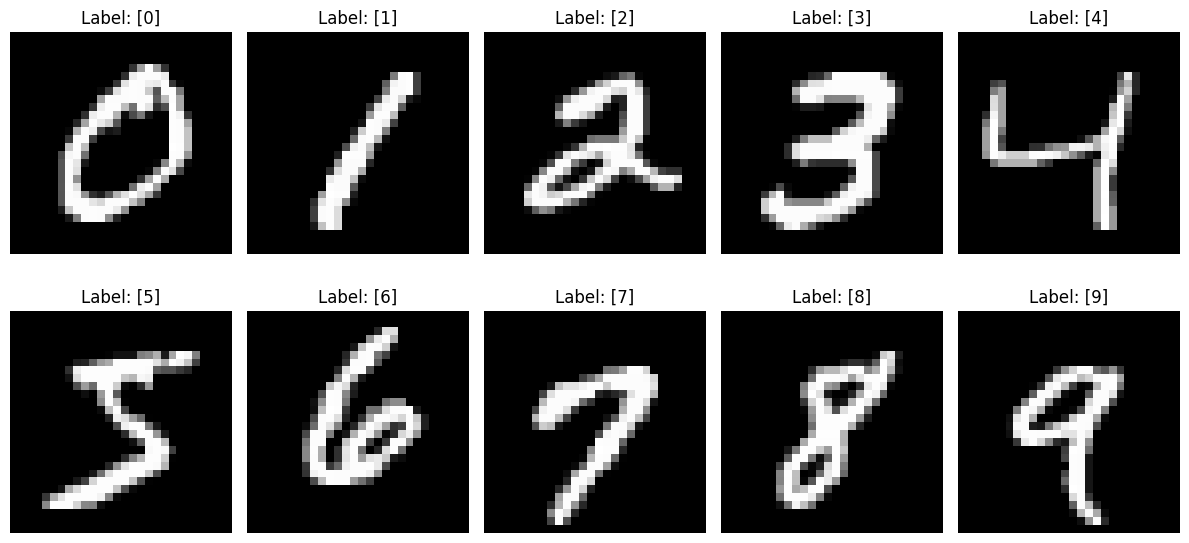

In [15]:
import matplotlib.pyplot as plt

# 이미지와 레이블 출력
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i in range(10):
    ax = axes[i // 5, i % 5]
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title('Label: {}'.format(y[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()


- 정확도를 구하기 위한 함수 정의

In [39]:
def create_repeat_matrix(n, num_columns):
    # 0부터 num_columns - 1까지의 값을 반복하여 생성
    repeated_values = np.tile(np.arange(num_columns), (n, 1))
    return repeated_values

In [66]:
def find_closest_index(prediction, label):
    
    result = create_repeat_matrix(len(prediction), 10)
    # 각 행에 대한 차이의 제곱을 계산하여 합산
    differences = (prediction - result) ** 2
    #print(np.round(differences,1))
    closest_index = np.argmin(differences, axis=1)
    #print(closest_index)
    y_pred = np.reshape(closest_index, (-1,1))
    total = np.sum(label == y_pred) / len(label)
    
    return total

In [67]:
y_test = np.reshape(y_test, (-1,1))

- MNIST 10개에 대한 선형회귀 10회 수행

In [76]:
from tensorflow import keras
from tensorflow.keras import layers
import sys

w_11_list = []
test_acc_list = []

for i in range(10):
    def Linear_regression():

        inputs = layers.Input(shape=(784,))
        x = layers.Dense(1)(inputs)

        model = keras.Model(inputs, x)
        return model

    model = Linear_regression()

    model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9, learning_rate=0.001),
                                  loss='mean_squared_error', metrics=['accuracy'])
    
    epoch = 5000

    model.fit(x=X,y=y, batch_size=10, shuffle=False, epochs=epoch,
                          verbose=0)
    
    train_loss, _ = model.evaluate(X, y)
    print("{}th 모델 학습데이터 손실 값 : {}".format(i, np.round(train_loss,2)))
    if i == 0 :
        train_prediction = model.predict(X)
        print("{}th 모델 예측 : {}".format(i, np.round(train_prediction)) )

        train_acc = find_closest_index(prediction=train_prediction, label=y)
        print("학습데이터 정확도 : {}".format(train_acc))
    
    test_prediction = model.predict(X_test)
    test_acc = find_closest_index(prediction=test_prediction, label=y_test)
    test_acc_list.append(test_acc)
    print("시험데이터 정확도 : {}".format(test_acc))
    
    w = np.array(model.weights[0][0,0])
    w_11_list.append(w)

print("선형회귀 모델 10회 수행 후 회귀계수의 첫 번째 w_1 값에 대한 \n평균 : {}\n표준편차 : {}".format(np.mean(w_11_list), np.std(w_11_list)))  
print("시험데이터에 대한 정확도 10회 평균과 표준편차 : {}+-{}".format(np.mean(test_acc_list), np.std(test_acc_list)))

1/1 [==============================] - 0s 66ms/step - loss: 3.5527e-16 - accuracy: 0.2000
0th 모델 학습데이터 손실 값 : 0.0
1/1 [==============================] - 0s 28ms/step
0th 모델 예측 : [[-0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]]
학습데이터 정확도 : 1.0
313/313 [==============================] - 0s 732us/step
시험데이터 정확도 : 0.1579
1/1 [==============================] - 0s 66ms/step - loss: 2.2737e-14 - accuracy: 0.2000
1th 모델 학습데이터 손실 값 : 0.0
313/313 [==============================] - 0s 734us/step
시험데이터 정확도 : 0.1537
1/1 [==============================] - 0s 68ms/step - loss: 4.5497e-14 - accuracy: 0.2000
2th 모델 학습데이터 손실 값 : 0.0
313/313 [==============================] - 0s 737us/step
시험데이터 정확도 : 0.1486
1/1 [==============================] - 0s 72ms/step - loss: 9.1149e-14 - accuracy: 0.2000
3th 모델 학습데이터 손실 값 : 0.0
313/313 [==============================] - 0s 860us/step
시험데이터 정확도 : 0.1572
1/1 [==============================] - 0s 68ms/step - loss: 4.0523e-16 - accuracy: 0.2000

## 
- Deep neural network 비교

In [78]:
from tensorflow import keras
from tensorflow.keras import layers
import sys

w_11_list = []
test_acc_list = []

for i in range(10):
    def dnn():

        inputs = layers.Input(shape=(784,))
        x = layers.Dense(512, activation='tanh')(inputs)
        x = layers.Dense(1)(x)

        model = keras.Model(inputs, x)
        return model

    model = dnn()

    model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9, learning_rate=0.001),
                                  loss='mean_squared_error', metrics=['accuracy'])
    
    epoch = 5000

    model.fit(x=X,y=y, batch_size=10, shuffle=False, epochs=epoch,
                          verbose=0)
    
    train_loss, _ = model.evaluate(X, y)
    print("{}th 모델 학습데이터 손실 값 : {}".format(i, np.round(train_loss,2)))
    if i == 0 :
        train_prediction = model.predict(X)
        print("{}th 모델 예측 : {}".format(i, np.round(train_prediction)) )

        train_acc = find_closest_index(prediction=train_prediction, label=y)
        print("학습데이터 정확도 : {}".format(train_acc))
    
    test_prediction = model.predict(X_test)
    test_acc = find_closest_index(prediction=test_prediction, label=y_test)
    test_acc_list.append(test_acc)
    print("시험데이터 정확도 : {}".format(test_acc))
    
    w = np.array(model.weights[0][0,0])
    w_11_list.append(w)

print("신경망 모델 10회 수행 후 회귀계수의 첫 번째 w_1 값에 대한 \n평균 : {}\n표준편차 : {}".format(np.mean(w_11_list), np.std(w_11_list)))  
print("시험데이터에 대한 정확도 10회 평균과 표준편차 : {}+-{}".format(np.mean(test_acc_list), np.std(test_acc_list)))

1/1 [==============================] - 0s 73ms/step - loss: 5.7732e-15 - accuracy: 0.2000
0th 모델 학습데이터 손실 값 : 0.0
1/1 [==============================] - 0s 32ms/step
0th 모델 예측 : [[-0.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]]
학습데이터 정확도 : 1.0
313/313 [==============================] - 0s 809us/step
시험데이터 정확도 : 0.1545
1/1 [==============================] - 0s 73ms/step - loss: 0.0000e+00 - accuracy: 0.2000
1th 모델 학습데이터 손실 값 : 0.0
313/313 [==============================] - 0s 754us/step
시험데이터 정확도 : 0.1513
1/1 [==============================] - 0s 69ms/step - loss: 2.2743e-14 - accuracy: 0.2000
2th 모델 학습데이터 손실 값 : 0.0
313/313 [==============================] - 0s 818us/step
시험데이터 정확도 : 0.1481
1/1 [==============================] - 0s 71ms/step - loss: 0.0000e+00 - accuracy: 0.2000
3th 모델 학습데이터 손실 값 : 0.0
313/313 [==============================] - 0s 792us/step
시험데이터 정확도 : 0.1557
1/1 [==============================] - 0s 73ms/step - loss: 1.4266e-15 - accuracy: 0.2000

## 
#### 실험 2. m(60,000개) << n(784차원) 인 상황에서 선형회귀와 Deep neural network를 수행해봄 
- mean squared error를 가지고 평가하고 output은 0에서 9까지 레이블을 맞추게하는 연속적인 예측값을 갖게하고 최소제곱하는 것으로 둠   
- output에 대한 정확도는 예측한 값이 0부터 9까지 중 l2-norm이 가장 작은 것을 예측하는 것으로함   
- 예를 들어 예측값이 3.1인 경우 0부터 9까지 중 3이 가장 가까운 l2-norm이므로 3을 예측했다고 표시
- 이를 10회 시행함.

* 학습 후 확인해야 하는 지표 :
   1. 선형회귀 파라미터의 분산이 클 것임(회귀계수 784개와 절편 1개의 10회에 대한 평균과 표준편차 기재
   2. 시험데이터 10,000개에 대해 정확히 예측할 것인가?

In [79]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import os
(X, y), (X_test, y_test) = mnist.load_data()

# data preprocessing
X = X.reshape(X.shape[0], 784).astype('float32') / 255.
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255.

y = np.reshape(y, (-1,1))
y_test = np.reshape(y_test, (-1,1))

- MNIST 60,000개에 대해 선형회귀 10회 수행

In [83]:
from tensorflow import keras
from tensorflow.keras import layers
import sys

w_11_list = []
test_acc_list = []

for i in range(10):
    def Linear_regression():

        inputs = layers.Input(shape=(784,))
        x = layers.Dense(1)(inputs)

        model = keras.Model(inputs, x)
        return model

    model = Linear_regression()

    model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9, learning_rate=0.001),
                                  loss='mean_squared_error', metrics=['accuracy'])
    
    epoch = 50

    model.fit(x=X,y=y, batch_size=128, shuffle=False, epochs=epoch,
                          verbose=0)
    
    train_prediction = model.predict(X)
    train_loss, _ = model.evaluate(X, y)
    print("{}th 모델 학습데이터 손실 값 : {}".format(i, np.round(train_loss,2)))

    train_acc = find_closest_index(prediction=train_prediction, label=y)
    print("학습데이터 정확도 : {}".format(train_acc))
    
    test_prediction = model.predict(X_test)
    test_acc = find_closest_index(prediction=test_prediction, label=y_test)
    test_acc_list.append(test_acc)
    print("시험데이터 정확도 : {}".format(test_acc))
    
    w = np.array(model.weights[0][0,0])
    w_11_list.append(w)

print("선형회귀 모델 10회 수행 후 회귀계수의 첫 번째 w_1 값에 대한 \n평균 : {}\n표준편차 : {}".format(np.mean(w_11_list), np.std(w_11_list)))  
print("시험데이터에 대한 정확도 10회 평균과 표준편차 : {}+-{}".format(np.mean(test_acc_list), np.std(test_acc_list)))

1875/1875 [==============================] - 2s 1ms/step - loss: 3.2432 - accuracy: 0.1408
0th 모델 학습데이터 손실 값 : 3.24
학습데이터 정확도 : 0.24383333333333335
313/313 [==============================] - 0s 793us/step
시험데이터 정확도 : 0.2384
1875/1875 [==============================] - 2s 1ms/step - loss: 3.2433 - accuracy: 0.1409
1th 모델 학습데이터 손실 값 : 3.24
학습데이터 정확도 : 0.24326666666666666
313/313 [==============================] - 0s 1ms/step
시험데이터 정확도 : 0.2382
1875/1875 [==============================] - 2s 1ms/step - loss: 3.2432 - accuracy: 0.1408
2th 모델 학습데이터 손실 값 : 3.24
학습데이터 정확도 : 0.24366666666666667
313/313 [==============================] - 0s 759us/step
시험데이터 정확도 : 0.2379
1875/1875 [==============================] - 2s 1ms/step - loss: 3.2432 - accuracy: 0.1408
3th 모델 학습데이터 손실 값 : 3.24
학습데이터 정확도 : 0.24346666666666666
313/313 [==============================] - 0s 768us/step
시험데이터 정확도 : 0.2383
1875/1875 [==============================] - 2s 1ms/step - loss: 3.2431 - accuracy: 0.1408
4th 모델 학습데이터 손실

- MNIST 60,000개에 대해 dnn 수행

In [84]:
from tensorflow import keras
from tensorflow.keras import layers
import sys

w_11_list = []
test_acc_list = []

for i in range(10):
    def dnn():

        inputs = layers.Input(shape=(784,))
        x = layers.Dense(512, activation='tanh')(inputs)
        x = layers.Dense(1)(x)

        model = keras.Model(inputs, x)
        return model

    model = dnn()

    model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9, learning_rate=0.001),
                                  loss='mean_squared_error', metrics=['accuracy'])
    
    epoch = 50

    model.fit(x=X,y=y, batch_size=128, shuffle=False, epochs=epoch,
                          verbose=0)
    
    train_prediction = model.predict(X)
    train_loss, _ = model.evaluate(X, y)
    print("{}th 모델 학습데이터 손실 값 : {}".format(i, np.round(train_loss,2)))

    train_acc = find_closest_index(prediction=train_prediction, label=y)
    print("학습데이터 정확도 : {}".format(train_acc))
    
    test_prediction = model.predict(X_test)
    test_acc = find_closest_index(prediction=test_prediction, label=y_test)
    test_acc_list.append(test_acc)
    print("시험데이터 정확도 : {}".format(test_acc))
    
    w = np.array(model.weights[0][0,0])
    w_11_list.append(w)

print("신경망 모델 10회 수행 후 회귀계수의 첫 번째 w_1 값에 대한 \n평균 : {}\n표준편차 : {}".format(np.mean(w_11_list), np.std(w_11_list)))  
print("시험데이터에 대한 정확도 10회 평균과 표준편차 : {}+-{}".format(np.mean(test_acc_list), np.std(test_acc_list)))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.4637 - accuracy: 0.1767
0th 모델 학습데이터 손실 값 : 0.46
학습데이터 정확도 : 0.69535
313/313 [==============================] - 0s 809us/step
시험데이터 정확도 : 0.6687
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4531 - accuracy: 0.1776
1th 모델 학습데이터 손실 값 : 0.45
학습데이터 정확도 : 0.70685
313/313 [==============================] - 0s 825us/step
시험데이터 정확도 : 0.6699
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4304 - accuracy: 0.1793
2th 모델 학습데이터 손실 값 : 0.43
학습데이터 정확도 : 0.7149
313/313 [==============================] - 0s 838us/step
시험데이터 정확도 : 0.676
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4497 - accuracy: 0.1728
3th 모델 학습데이터 손실 값 : 0.45
학습데이터 정확도 : 0.70375
313/313 [==============================] - 0s 819us/step
시험데이터 정확도 : 0.6664
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4479 - accuracy: 0.1818
4th 모델 학습데이터 손실 값 : 0.45
학습데이터 정확도 : 0.7097833333333333
313/313

#### 
## 최소제곱해의 선형회귀 해석
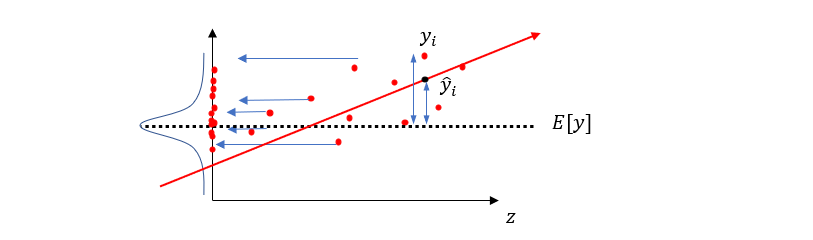
#### Linear regression 관점에서의 해석

$(n \times n_{0})$ 행렬 $Z$ : independent variables,

$(n \times 1)$ 인 $\mathbf{y}$ : dependent variable,

$(n_{0}\times 1)$ 인 $\mathbf{w}$ : regression coefficients, (intercept 생략)

$(n \times 1) $ 인 $\mathbf{\epsilon}$ : random variable

$y= Z\mathbf{w} + \mathbf{\epsilon}$ ... 선형모델 가정   
$E[\mathbf{\epsilon}]=0$   
$Var[\mathbf{\epsilon}]=\sigma^{2} I$   
$Cov[\epsilon_{i}, \epsilon_{j}]= 0 ,\forall i\neq j $... random variable에 대한 가정

$\mathbf{\epsilon}=\mathbf{y}- Z\mathbf{w}$

목적 : $\mathbf{\epsilon}$을 최소화하는 $\mathbf{w}$ 를 찾자

$min E[\mathbf{\epsilon}^{T}\mathbf{\epsilon}] =min E[(\mathbf{y}-Z\mathbf{w})^{T}(\mathbf{y}-Z\mathbf{w})]$ ... Risk minimization

관측된 $n$개의 $y_{i}, i=1,...,n$ 에 대해 $min \frac {1} {n}(\mathbf{y}-Z\mathbf{w})^{T}(\mathbf{y}-Z\mathbf{w})=min L$

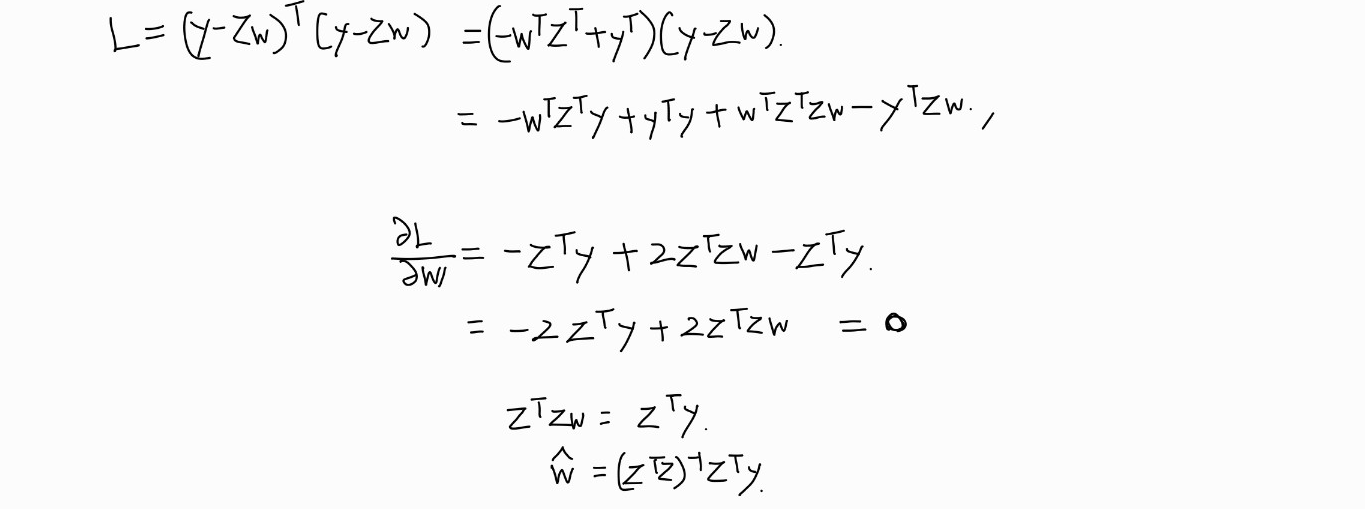

관측된 $n$개의 벡터 $\mathbf{y}$ 에 대해 구해진 해는 $\hat{\mathbf{w}}=(Z^{T}Z)^{-1}Z^{T}\mathbf{y}$

그리고 $\hat{\mathbf{w}}$은 estimator로써, $\mathbf{\epsilon}$ 의 가정에 의해 다음 성질을 만족함.

1. $E[\hat{\mathbf{w}}]=\mathbf{w}$ ... unbiased estimator
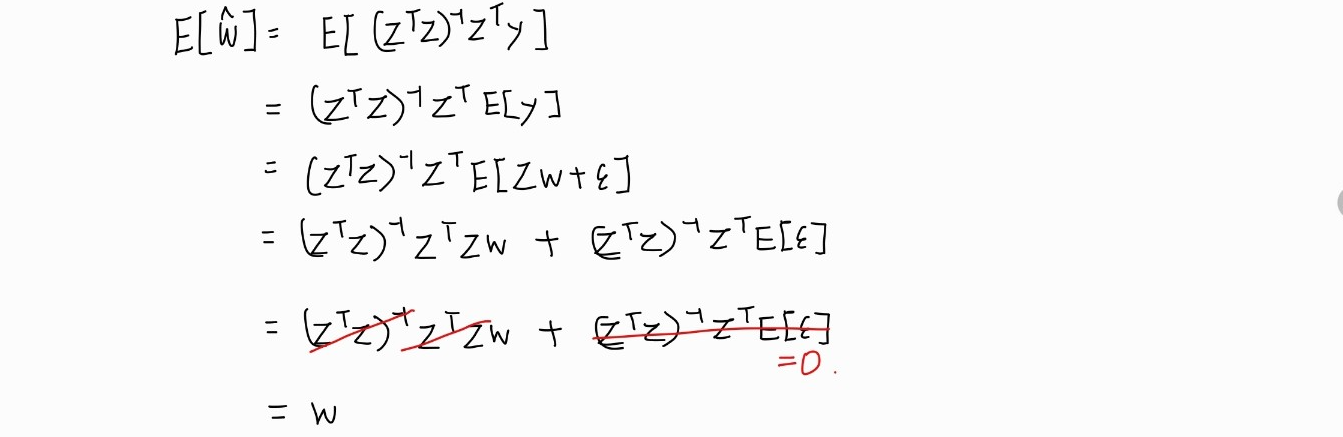

2. $Var[\hat{\mathbf{w}}]$ ... Gauss Markov theorem에 의해 BLUE(Best Linear Unbiased Estimator)로 알려져있음.(선형 추정량 중 가장 작은 분산을 가지는 추정량)
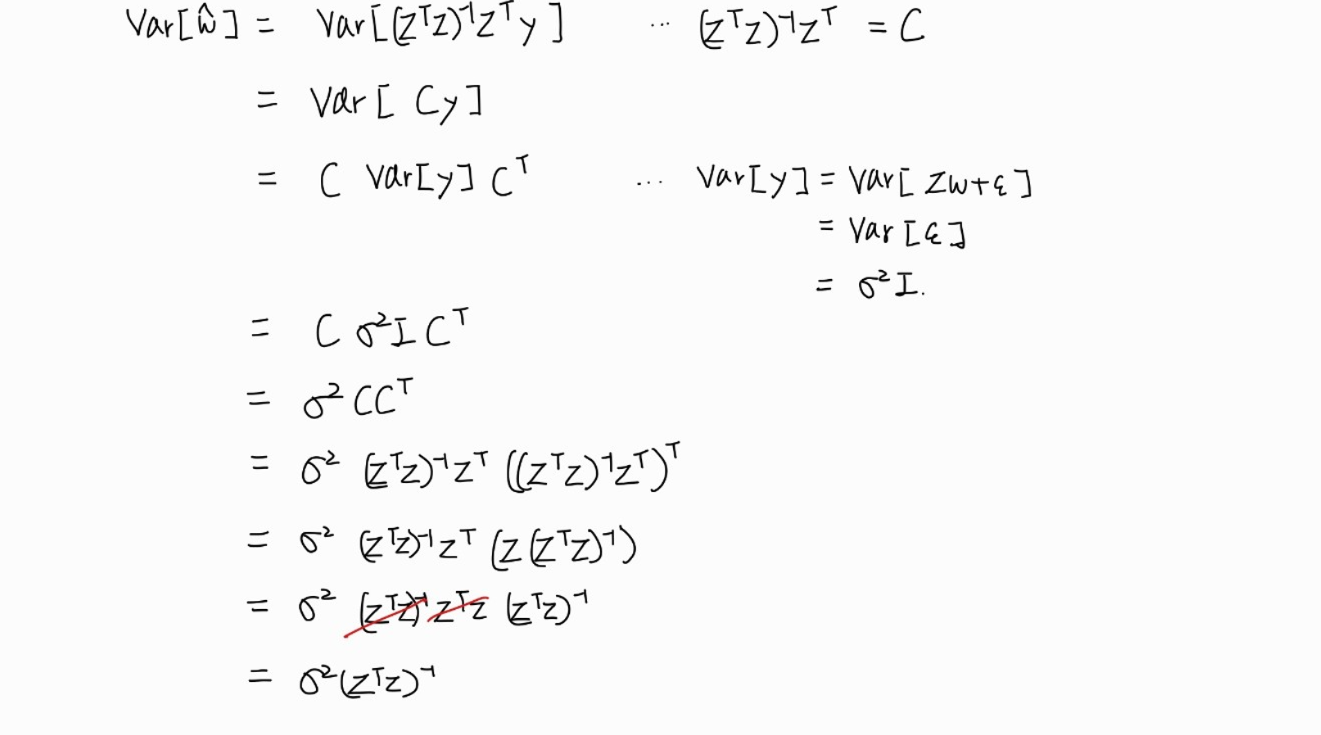

- 하지만 1,2번에서 $(Z^{T}Z)^{-1}$ 가 존재하지 않는 경우, 즉 변수들끼리 선형 함수관계를 가지는 경우에는 우리가 추정하여 찾은 $\hat{\mathbf{w}}$ 를 신뢰할 수 없음, 이를 방지하고자   
1. Variable selection, Variable extraction 등 $Z$ 변수를 고르는 방법이 있고,   
2. 다중공선성(Multi collinearity) , 분산팽창요인(Variance Inflation Factor) 등을 체크하는 방법이 있음.   
3. 또한 $\hat{\mathbf{w}}$ 에 (L1, L2) 등의 규제를 두어 필요없는 변수의 가중치를 제한하는 방법 등이 있음

#### $Z\hat{\mathbf{w}}=\hat{\mathbf{y}}$ 의 Col Z에 대한 기하적 해석
(Linear regression에 대한 일반적인 해석보다 Col Z에 대한 해석으로 해봄)

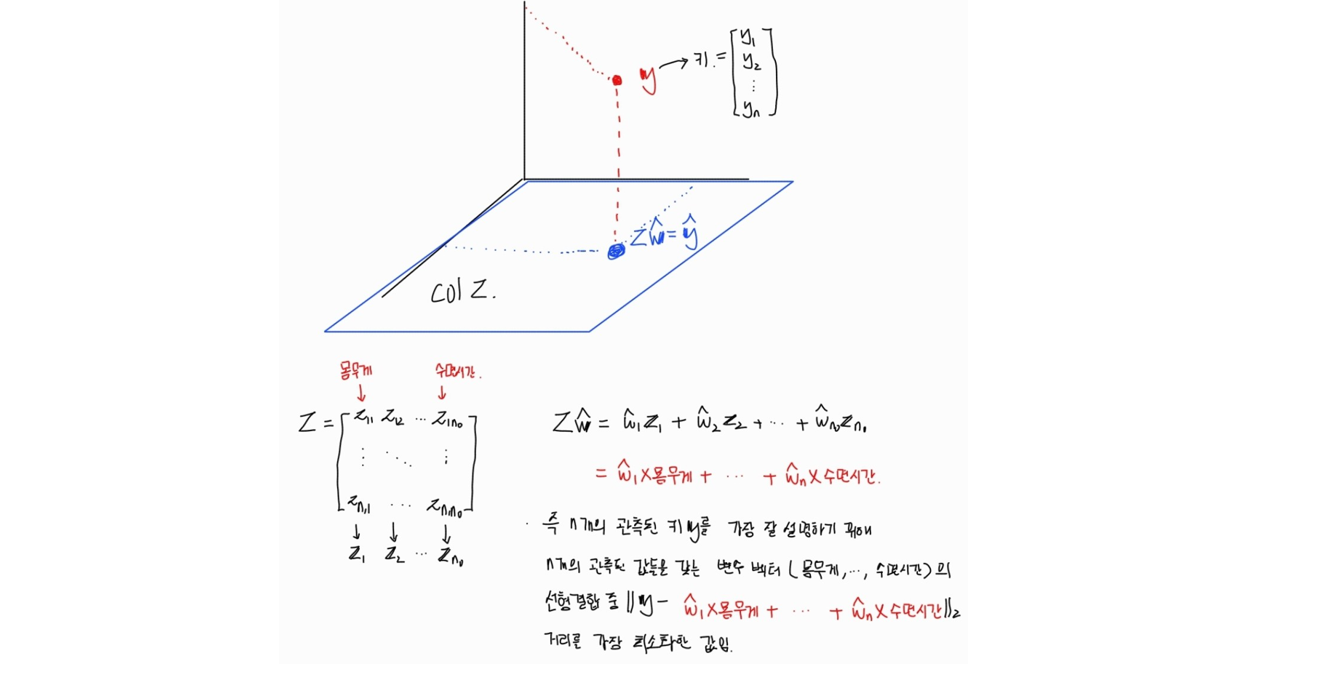

- 즉, $\parallel Z\hat{\mathbf{w}} - \mathbf{y} \parallel$

#### Deep Neural Network estimator의 해석
모델 가정 : $\mathbf{y} =W^{(L)}(\dots \sigma^{(1)}(W^{(1)}Z)) \dots) + \mathbf{\epsilon}$   

$ min (\mathbf{y} - \hat{\mathbf{y}})^{T}(\mathbf{y} - \hat{\mathbf{y}})$ = $min L$    
$s.t. \hat{\mathbf{y}} =\hat{W}^{(L)}(\dots \sigma^{(1)}(\hat{W}^{(1)}Z)) \dots)$

- 그럼 Deep Neural Network의 기울기=0 을 만드는 모든 파라미터에 대한 추정량 :   
1.  $E[\frac {\partial L} {\partial \hat{W_{all}}}=0] $ 은 어떤 성질을 가지는가?   
    - 만약, 의사역행렬(Pseudo inverse matrix)을 가지고, 일대일 대응이 되는 활성함수를 사용하는 경우   
    - $\frac {\partial L} {\partial \hat{W_{all}}} = B^{-1}Z $등의 형태로 나타나게 된다면?   

2.  $Var[\frac {\partial L} {\partial \hat{W_{all}}}=0] $ 은 어떤 성질을 가지는가?